<a href="https://colab.research.google.com/github/nathanschoeck/Computer-Vision/blob/main/Image_Transformations_Barrel_Distortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Barreling (barrel distortion) is a type of image warping where straight lines appear curved outward, similar to looking through a fisheye lens. Below is Python code to simulate barrel distortion using OpenCV.

1. Import Libraries

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

2. Apply Barrel Distortion Function

In [7]:
def barrel_distortion(image, k=0.0001):
    """
    Applies barrel distortion to an image.

    Args:
        image: Input image (NumPy array).
        k: Distortion coefficient. Higher values increase the barreling effect.

    Returns:
        Warped image with barrel distortion.
    """
    height, width = image.shape[:2]

    # Create normalized coordinates for the image
    x, y = np.meshgrid(np.arange(width), np.arange(height))
    x = x - width / 2
    y = y - height / 2

    # Normalize the coordinates to the range [-1, 1]
    x_norm = x / (width / 2)
    y_norm = y / (height / 2)

    # Compute radius from the center
    r = np.sqrt(x_norm**2 + y_norm**2)

    # Apply barrel distortion formula
    x_distorted = x_norm * (1 + k * r**2)
    y_distorted = y_norm * (1 + k * r**2)

    # Map normalized distorted coordinates back to pixel coordinates
    x_distorted = (x_distorted + 1) * (width / 2)
    y_distorted = (y_distorted + 1) * (height / 2)

    # Remap the image to apply the distortion
    map_x = x_distorted.astype(np.float32)
    map_y = y_distorted.astype(np.float32)
    warped_image = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

    return warped_image

3. Load the input image

In [8]:
image_path = "/Girl_with_a_Pearl_Earring.jpg"
image = cv2.imread(image_path)

4. Apply barrel distortion

In [9]:
k_value = 0.5  # Distortion coefficient; adjust for stronger/weaker effect
barreled_image = barrel_distortion(image, k=k_value)

5. Display the results

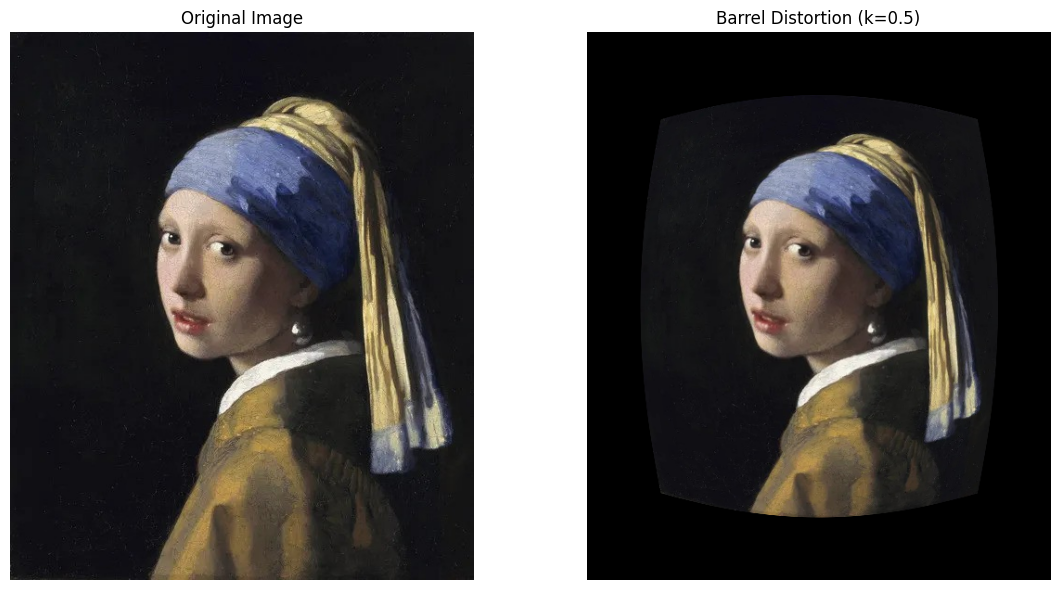

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(barreled_image, cv2.COLOR_BGR2RGB))
plt.title(f"Barrel Distortion (k={k_value})")
plt.axis("off")

plt.tight_layout()
plt.show()

6. Save the result

In [11]:
cv2.imwrite("barreled_image.jpg", barreled_image)

True